Saving 4. Predict Heart Disease.csv to 4. Predict Heart Disease.csv
✅ File uploaded and read successfully!

📋 First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0



🧼 Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

✅ Evaluation Metrics:
✔️ Accuracy: 88.52%
✔️ Precision: 0.93
✔️ Recall: 0.84


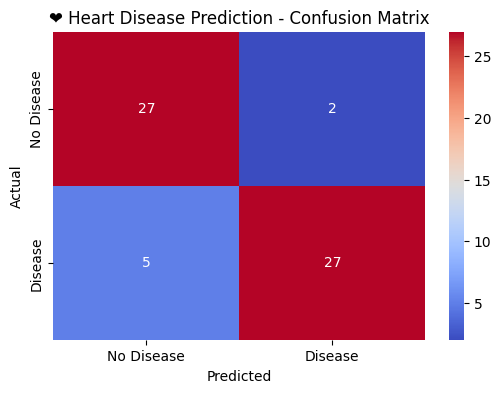

In [5]:
# 📂 Step 1: Upload CSV directly (No manual input)
from google.colab import files
import pandas as pd
uploaded = files.upload()

# 🧠 Step 2: Read uploaded CSV
import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("✅ File uploaded and read successfully!")

# 📊 Step 3: Show first 5 rows in neat format
from IPython.display import display
print("\n📋 First 5 rows of the dataset:")
display(df.head())

# 🧹 Step 4: Check missing values
print("\n🧼 Checking for missing values:")
print(df.isnull().sum())

# 🧮 Step 5: Prepare features and labels
if 'target' not in df.columns:
    print("❌ 'target' column not found.")
else:
    X = df.drop('target', axis=1)
    y = df['target']

    # 🔧 Step 6: Feature scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 🔀 Step 7: Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # 🌲 Step 8: Train model
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42)
    model.fit(X_train, y_train)

    # 📈 Step 9: Evaluation
    from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    print("\n✅ Evaluation Metrics:")
    print(f"✔️ Accuracy: {acc*100:.2f}%")
    print(f"✔️ Precision: {prec:.2f}")
    print(f"✔️ Recall: {rec:.2f}")

    # 🔥 Step 10: Confusion matrix heatmap
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
                xticklabels=["No Disease", "Disease"],
                yticklabels=["No Disease", "Disease"])
    plt.title("❤️ Heart Disease Prediction - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
